# 仅全链接层实现手写数字识别,tensorflow版本

## 模型定义

- 输入层：28*28=784
- 输出层：10
- 隐藏层：784(input)->256(relu)(dropout-20%)->128(tanh)(dropout-20%)->10(softmax)

## 数据处理

- tf集成的keras中提供了mnist数据集，其数据格式为`numpy.ndarray`
- 将数据集展平为一维向量并进行归一化
- 将标签进行one-hot编码

## 训练

- 优化器为`Adam`
- 损失函数为`categorical_crossentropy` - 分类交叉熵
- 评估指标为`accuracy`
- 模型训练时划分训练集和验证集，由验证集对模型进行评估以调整学习率
- 保存模型到本地 - tf默认保存的内容包括模型的结构、权重、优化器的状态等

## 测试

- 使用keras的接口对模型进行加载
- 对传入的图片进行处理，先要变28*28，再变一维向量，最后使用同样的归一化
- 输出的结果是10个数字的概率，使用tf的argmax函数获取概率最大的数字即为预测结果


可用设备： [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2025-03-14 18:29:18.749063: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-14 18:29:18.749282: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-14 18:29:18.749287: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-14 18:29:18.749596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-14 18:29:18.750001: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/10


2025-03-14 18:29:19.283391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 6s 12ms/step - loss: 0.4132 - accuracy: 0.8765 - val_loss: 0.2169 - val_accuracy: 0.9364
Epoch 2/10
375/375 [==============================] - 4s 12ms/step - loss: 0.2421 - accuracy: 0.9277 - val_loss: 0.1686 - val_accuracy: 0.9514
Epoch 3/10
375/375 [==============================] - 5s 12ms/step - loss: 0.2034 - accuracy: 0.9388 - val_loss: 0.1450 - val_accuracy: 0.9585
Epoch 4/10
375/375 [==============================] - 5s 12ms/step - loss: 0.1796 - accuracy: 0.9459 - val_loss: 0.1336 - val_accuracy: 0.9612
Epoch 5/10
375/375 [==============================] - 5s 13ms/step - loss: 0.1649 - accuracy: 0.9498 - val_loss: 0.1226 - val_accuracy: 0.9633
Epoch 6/10
375/375 [==============================] - 4s 12ms/step - loss: 0.1542 - accuracy: 0.9530 - val_loss: 0.1183 - val_accuracy: 0.9644
Epoch 7/10
375/375 [==============================] - 4s 11ms/step - loss: 0.1479 - accuracy: 0.9549 - val_loss: 0.1147 - val_accuracy: 0.9664
Epoch 8/10

/Users/wolves/mambaforge/envs/ail/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


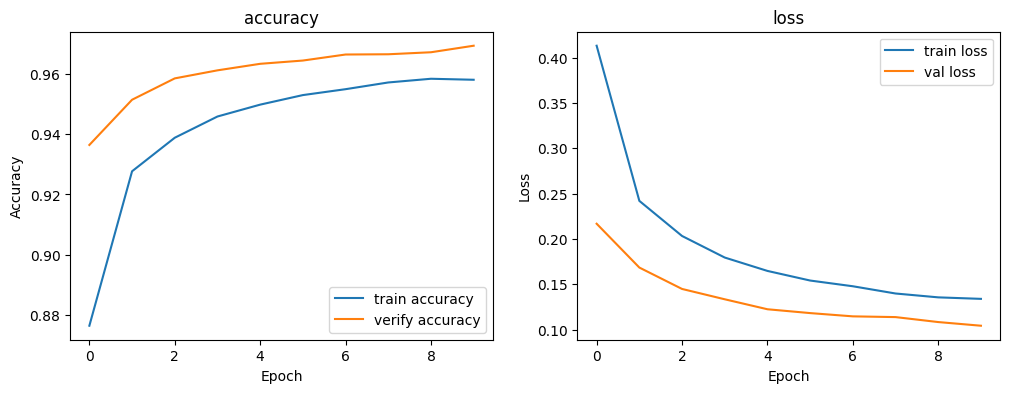

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from keras import layers
import matplotlib.pyplot as plt
print("可用设备：", tf.config.list_physical_devices())

# 加载mnist数据集
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


# 处理x数据，mnist数据集为灰度图片，范围为0-255，直接除以255，等同归一化
x_train = x_train.reshape(-1, 28 * 28).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28 * 28).astype('float32') / 255.0

# 处理y数据，mnist数据集为0-9的数字，需要将其转换为one-hot编码
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

# 构建神经网络
model = keras.Sequential(
    [
        layers.Dense(256, activation='relu',input_shape=(28*28,)),
        layers.Dropout(0.2),
        layers.Dense(128, activation='tanh'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ]
)

# 编译模型 自适应矩估计
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 训练模型，验证集比例为0.2(帮助adam判断是否需要调整参数)，训练10轮
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          validation_split=0.2)

test_loss,test_acc = model.evaluate(x_test, y_test)
print(f'accuracy: {test_acc:.4f}')

model.save('./models/mnist_model-tf.h5')  # 保存为HDF5格式
print("模型已保存到 ./models/mnist_model-tf.h5")

#plt绘制
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='verify accuracy')
plt.title('accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


2025-03-14 18:57:55.832397: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-03-14 18:57:55.832421: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-03-14 18:57:55.832428: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-03-14 18:57:55.832455: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-14 18:57:55.832469: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


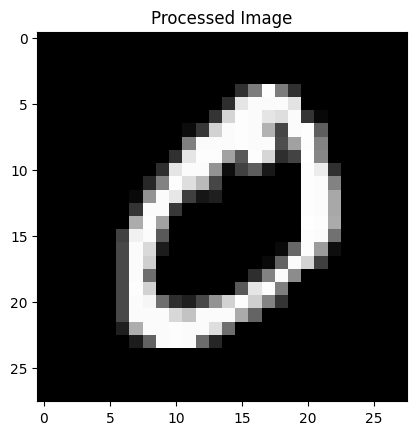

预处理后的数据范围： 0.12156863 0.83137256


2025-03-14 18:57:56.529571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 753ms/step
预测概率分布： [[9.7845614e-01 1.6016074e-06 5.1186988e-03 4.2060162e-03 3.1019366e-07
  1.1911159e-02 5.7799196e-05 6.7962850e-05 3.7460737e-05 1.4272679e-04]]
预测结果：0


In [1]:
# 测试tf训练的手写数据识别
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 加载模型
model = tf.keras.models.load_model('./models/mnist_model-tf.h5')

# 加载并预处理图片
image_path = './test/0.png'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(28, 28), color_mode='grayscale')
image = tf.keras.preprocessing.image.img_to_array(image)

# 可视化预处理后的图片
plt.imshow(image, cmap='gray')
plt.title('Processed Image')
plt.show()

# 进一步处理
image = image.reshape(-1, 28 * 28).astype('float32') / 255.0

# 打印预处理后的数据
print("预处理后的数据范围：", np.min(image), np.max(image))

# 进行预测
predictions = model.predict(image)
print("预测概率分布：", predictions)

# 获取预测结果
predicted_class = tf.argmax(predictions, axis=1).numpy()[0]
print(f"预测结果：{predicted_class}")

# 仅全链接层手写识别 - torch

## 模型定义
- 输入层：28*28=784
- 输出层：10
- 隐藏层：784(input)->256(relu)(dropout-20%)->128(tanh)(dropout-20%)->10(softmax)

## 数据处理
- torchvision中提供了mnist数据集的下载和处理(转换为tensor并进行归一化)
- 使用dataloader对数据进行分批处理

## 定义模型

- torch对模型的定义更加细化，需要继承nn.Module类
- 定义模型的构造函数，定义模型的层
- 定义模型的前向传播函数，定义模型的层之间的连接关系和数据的流动方向

## 训练

- 设置设备
- 定义损失函数为交叉熵损失函数
- 定义优化器为Adam优化器
- 与tensorflow不同的是，torch需要手动实现训练过程
- 并且，torch中的adam优化器不会根据训练集或者验证集对学习率进行调整，梯度的一阶矩（均值）和二阶矩（方差）​动态调整每个参数的学习率，如果想让其根据进行特定的数据集学习率调整，需要加入学习调度器的支持

## 具体训练

- 每一个batch中，需要将梯度清零
- 每个batch中的image就是一次训练，需要将其传入指定设备
- 每个image轮次都需要先试用优化器对每个参数的梯度清零，因为torch的梯度计算本质是对每个参数的梯度累加
- 前向传播出结果
- 使用loss函数计算损失，使用loss.backward自动梯度计算并存储（累加）在每个权重的.grad属性中
- 最后使用优化器对每个参数的梯度进行更新

## 保存

- torch模型的保存需要手动指定保存的内容，如模型的参数、优化器的状态、损失函数的状态等，类似于键值对的形式存入模型文件

## 预测

- torch的模型加载使用torch.load函数可以直接加载，但是这个并非是模型实例，而是一个字典，需要手动指定加载的内容以加载出模型，然后再对模型进行参数的加载
- 需要将模型设置为评估模式，否则会出现梯度计算的问题
- 图片传入后可以使用torchvision的transforms进行处理（分辨率，灰度图，向量化，归一化）
- 预测结果为tensor，需要使用torch.argmax函数获取最大值的索引，即为预测结果（注意预测时要在非自动梯度计算下，节省性能内存并防止意外更新）


Epoch 1/10: 100%|██████████| 938/938 [00:10<00:00, 87.50batch/s, loss=1.6135, acc=86.53%] 


Epoch 1/10 => Loss: 1.6118, Accuracy: 86.53%


Epoch 2/10: 100%|██████████| 938/938 [00:10<00:00, 92.81batch/s, loss=1.5511, acc=92.52%] 


Epoch 2/10 => Loss: 1.5395, Accuracy: 92.52%


Epoch 3/10: 100%|██████████| 938/938 [00:09<00:00, 96.63batch/s, loss=1.5393, acc=93.52%] 


Epoch 3/10 => Loss: 1.5278, Accuracy: 93.52%


Epoch 4/10: 100%|██████████| 938/938 [00:09<00:00, 97.68batch/s, loss=1.5318, acc=94.25%] 


Epoch 4/10 => Loss: 1.5204, Accuracy: 94.25%


Epoch 5/10: 100%|██████████| 938/938 [00:09<00:00, 97.31batch/s, loss=1.5334, acc=94.56%] 


Epoch 5/10 => Loss: 1.5171, Accuracy: 94.56%


Epoch 6/10: 100%|██████████| 938/938 [00:09<00:00, 97.19batch/s, loss=1.5135, acc=95.05%] 


Epoch 6/10 => Loss: 1.5119, Accuracy: 95.05%


Epoch 7/10: 100%|██████████| 938/938 [00:09<00:00, 96.52batch/s, loss=1.5211, acc=95.24%] 


Epoch 7/10 => Loss: 1.5097, Accuracy: 95.24%


Epoch 8/10: 100%|██████████| 938/938 [00:09<00:00, 99.28batch/s, loss=1.5137, acc=95.30%] 


Epoch 8/10 => Loss: 1.5089, Accuracy: 95.30%


Epoch 9/10: 100%|██████████| 938/938 [00:09<00:00, 99.06batch/s, loss=1.5127, acc=95.55%] 


Epoch 9/10 => Loss: 1.5063, Accuracy: 95.55%


Epoch 10/10: 100%|██████████| 938/938 [00:09<00:00, 100.77batch/s, loss=1.5100, acc=95.68%]


Epoch 10/10 => Loss: 1.5052, Accuracy: 95.68%
模型已保存到 ./models/mnist_model-torch.pth


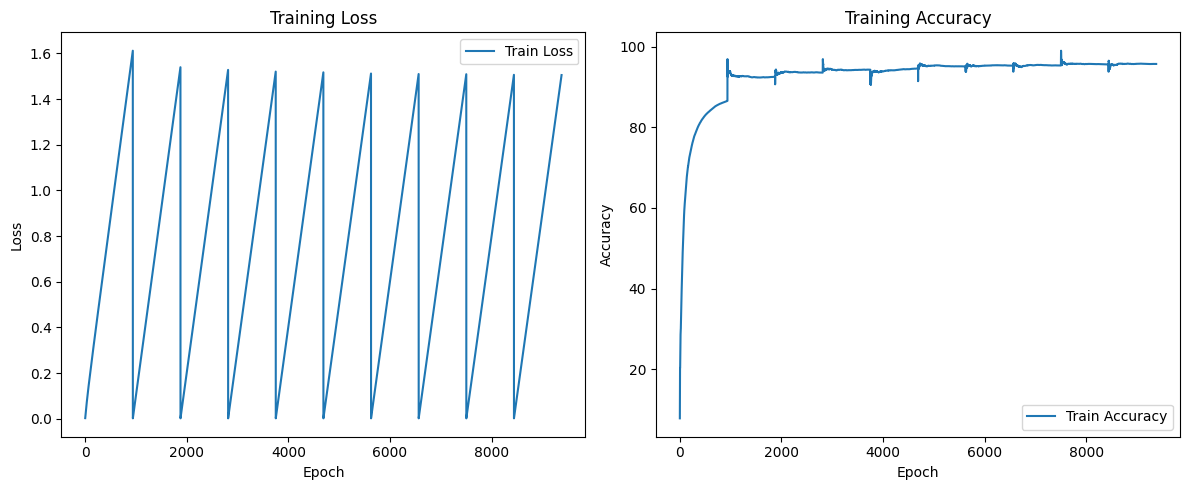

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torchvision import datasets,transforms
import matplotlib.pyplot as plt

# 处理数据
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5],std=[0.5])
])

# 导入数据
trainset = datasets.MNIST(root='./data',train=True,download=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

trainset = datasets.MNIST(root='./data',train=True,download=True,transform=transform)
testloader = torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

# 定义模型
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet,self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28,256)
        self.d1 = nn.Dropout(0.2)
        self.fc2 = nn.Linear(256,128)
        self.d2 = nn.Dropout(0.2)
        self.fc3 = nn.Linear(128,10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self,x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.d1(x)
        x = torch.tanh(self.fc2(x))
        x = self.d2(x)
        x = self.fc3(x)
        x = self.softmax(x)
        return x    
    
model = SimpleNet()

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

model.to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.001)

# 初始化训练统计信息
train_losses = []
train_accuracies = []

# 训练模型
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0
    
    # 添加进度条
    train_iter = tqdm(trainloader, desc=f'Epoch {epoch+1}/{epochs}', unit='batch')
    
    for images, labels in train_iter:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # 计算准确率
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
        # 更新进度条信息
        running_loss += loss.item()
        train_iter.set_postfix({
            'loss': f"{running_loss/(train_iter.n+1):.4f}",
            'acc': f"{100*correct/total:.2f}%"
        })

        # 保存训练统计信息
        epoch_loss = running_loss / len(trainloader)
        epoch_acc = 100 * correct / total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

# 在测试集上评估模型
model.eval()  # 设置为评估模式
test_loss = 0.0
test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in testloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 计算准确率
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()
        test_loss += loss.item()

# 打印测试集评估结果
test_loss /= len(testloader)
test_acc = 100 * test_correct / test_total
print(f"测试集评估结果 => Loss: {test_loss:.4f}, Accuracy: {test_acc:.2f}%")

# 保存模型
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'model_definition': SimpleNet  # 保存模型类
}, './models/mnist_model-torch.pth')
print("模型已保存到 ./models/mnist_model-torch.pth")

# 训练结束后绘制曲线
plt.figure(figsize=(12, 5))

# 绘制损失曲线
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()


# 绘制准确率曲线
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

/var/folders/cf/pykndz2n2tl6ff6jl9bcbb480000gn/T/ipykernel_3293/2215973287.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('./models/mnist_model-

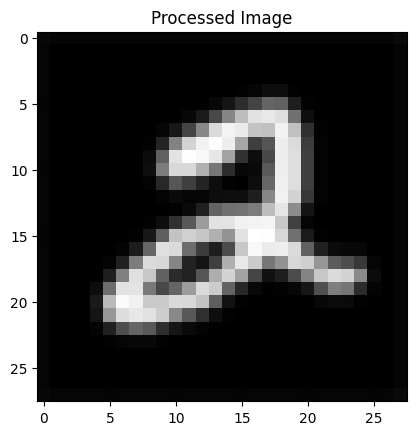

预测概率分布： [[0.08533675 0.08533675 0.2319692  0.0853368  0.08533675 0.08533675
  0.08533675 0.08533675 0.08533676 0.08533675]]
预测结果：2


In [4]:
# 测试torch训练的手写数据识别
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 加载模型
checkpoint = torch.load('./models/mnist_model-torch.pth')
model = checkpoint['model_definition']()
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()  # 设置为评估模式

# 图片预处理
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 加载并预处理图片
image_path = './test/2.png'
image = Image.open(image_path)
processed_image = transform(image)

# 可视化预处理后的图片
plt.imshow(processed_image.squeeze(), cmap='gray')
plt.title('Processed Image')
plt.show()

# 进行预测
with torch.no_grad():
    output = model(processed_image.unsqueeze(0))
    probabilities = torch.nn.functional.softmax(output, dim=1)
    predicted_class = torch.argmax(probabilities, dim=1).item()

print("预测概率分布：", probabilities.numpy())
print(f"预测结果：{predicted_class}")


/var/folders/cf/pykndz2n2tl6ff6jl9bcbb480000gn/T/ipykernel_3293/3759706733.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('./models/mnist_model-

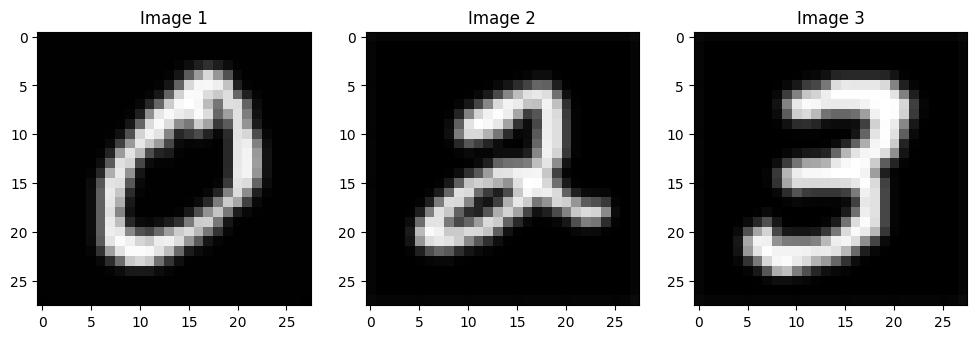

图片 ./test/0.png 的预测结果：0
概率分布：[0.23196927 0.08533674 0.08533675 0.08533674 0.08533674 0.08533674
 0.08533674 0.08533675 0.08533674 0.08533674]
----------------------------------------
图片 ./test/2.png 的预测结果：2
概率分布：[0.08533675 0.08533675 0.2319692  0.0853368  0.08533675 0.08533675
 0.08533675 0.08533675 0.08533676 0.08533675]
----------------------------------------
图片 ./test/3.png 的预测结果：3
概率分布：[0.08533674 0.08533674 0.08533674 0.23196931 0.08533674 0.08533674
 0.08533674 0.08533674 0.08533674 0.08533674]
----------------------------------------


In [6]:
# 多图片同时预测
import torch
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 加载模型
checkpoint = torch.load('./models/mnist_model-torch.pth')
model = checkpoint['model_definition']()
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()  # 设置为评估模式

# 图片预处理
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.Grayscale(),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 加载并预处理多个图片
image_paths = ['./test/0.png', './test/2.png', './test/3.png']  # 添加更多图片路径
images = [Image.open(path) for path in image_paths]
processed_images = torch.stack([transform(img) for img in images])  # 将多个图片堆叠成一个批次

# 可视化预处理后的图片
fig, axes = plt.subplots(1, len(images), figsize=(12, 4))
for i, img in enumerate(processed_images):
    axes[i].imshow(img.squeeze(), cmap='gray')
    axes[i].set_title(f'Image {i+1}')
plt.show()

# 进行预测
with torch.no_grad():
    outputs = model(processed_images)  # 直接传入批次数据
    probabilities = torch.nn.functional.softmax(outputs, dim=1)
    predicted_classes = torch.argmax(probabilities, dim=1).numpy()

# 打印预测结果
for i, (path, pred, prob) in enumerate(zip(image_paths, predicted_classes, probabilities)):
    print(f"图片 {path} 的预测结果：{pred}")
    print(f"概率分布：{prob.numpy()}")
    print("-" * 40)